In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

In [2]:
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')
display(ta_q.crs)
ta_q

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,oidrova,krova,dateimport,ShapeArea,geometry
0,1,1,01/12/2015 02:28:14,1.301654e+07,"POLYGON ((670795.655 3555762.452, 670797.577 3..."
1,2,2,01/12/2015 02:28:14,8.013404e+06,"POLYGON ((672021.029 3553364.492, 672014.690 3..."
2,3,3,01/12/2015 02:28:14,3.380430e+06,"POLYGON ((668311.070 3552547.701, 668311.229 3..."
3,4,4,01/12/2015 02:28:14,4.510255e+06,"POLYGON ((670771.828 3552544.564, 670771.584 3..."
4,5,6,01/12/2015 02:28:14,2.089044e+06,"POLYGON ((668160.048 3550196.192, 668162.425 3..."
5,6,9,01/12/2015 02:28:14,7.879856e+06,"POLYGON ((668811.121 3546980.368, 668808.698 3..."
6,7,5,01/12/2015 02:28:14,3.024297e+06,"POLYGON ((666698.783 3550619.396, 666701.339 3..."
7,8,8,01/12/2015 02:28:14,3.420996e+06,"POLYGON ((667954.133 3548820.374, 667956.725 3..."
8,9,7,01/12/2015 02:28:14,6.343551e+06,"POLYGON ((665854.540 3548193.053, 665868.137 3..."


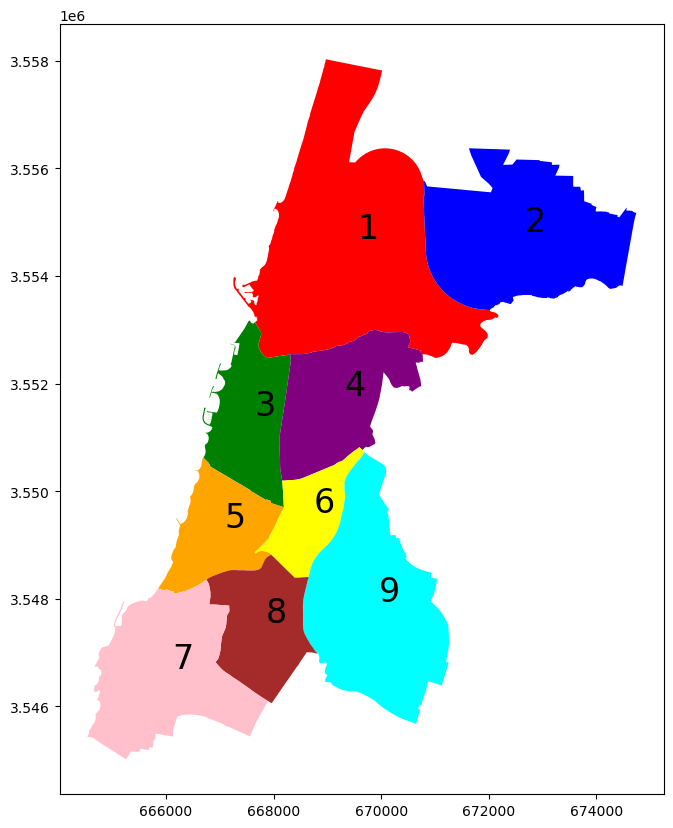

In [3]:
ta_q['index'] = ta_q.index

# Define a list of colors
color_map = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'purple',
    5: 'orange', 6: 'yellow', 7: 'pink', 8: 'brown', 9: 'cyan'
}

# Basic plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each shape with a different color from the list
for idx, row in ta_q.iterrows():
    color = color_map[row['krova']]  # Cycle through the colors list
    gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=color)

    # Get the centroid of the polygon to place the text
    centroid = row['geometry'].centroid
    ax.annotate(text=row['krova'], xy=(centroid.x, centroid.y), 
                xytext=(3, 3), textcoords="offset points",
                fontsize=24, color='black')

plt.show()

In [4]:
# Exclude micro mobility
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23
micro_m = [SCOOTER, E_BICYCLE, BICYCLE]


In [5]:
# Load original accident data
i_m_h_ta_gdf = gpd.read_parquet('./csv_tables/i_m_h_ta_gdf.parquet')

In [6]:
# Accidents that are not MM
i_m_h_ta_no_mm_gdf = i_m_h_ta_gdf[~(i_m_h_ta_gdf.involve_vehicle_type.isin(micro_m))].copy()

In [7]:
# Accidents that are just MM
i_m_h_ta_mm_gdf =  gpd.read_parquet('./csv_tables/i_m_h_ta_mm_gdf.parquet')
display(i_m_h_ta_mm_gdf.crs)
i_m_h_ta_mm_gdf.head(5)

<Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date,geometry
41,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-07-27 01:00:00,POINT (667544.749 3549959.961)
50,2013001742,32013001742,3,3,2,נהג נפגע,0,7,30-34,2,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-10-07 01:30:00,POINT (667286.918 3548726.540)
131,2013001350,12013001350,1,1,2,נהג נפגע,0,5,20-24,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,NaN,2013-08-25 01:00:00,POINT (667023.688 3548785.170)
196,2013000147,12013000147,1,1,2,נהג נפגע,0,8,35-39,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,2.0,בינוני,9110323.0,2013-09-19 00:00:00,POINT (668158.751 3551284.678)
197,2013000147,12013000147,1,1,2,נהג נפגע,0,6,25-29,1,...,1.0,ישראלי,99.0,0.0,לא ידוע,2.0,בינוני,9110323.0,2013-09-19 00:00:00,POINT (668158.751 3551284.678)


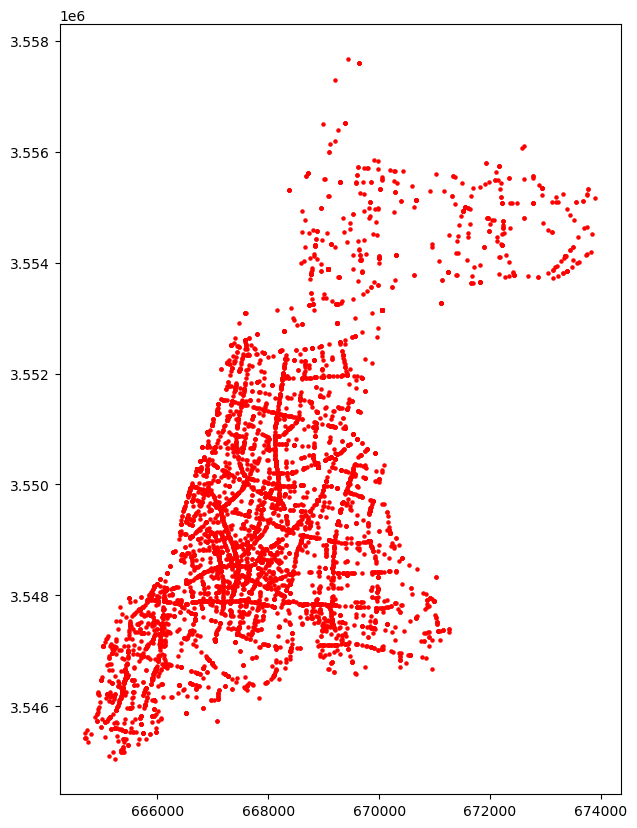

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )
plt.show()

In [9]:
bp_ta_bp_and_meta = gpd.read_parquet('./csv_tables/bp_ta_bp_and_meta.parquet')
bp_ta_bp_and_meta.head(5)

,oid_shvil,msorech,dateimport,create_year,shemmikta,create_date,geometry,width,direction,bitzua,miflas,date_created
0,1,95.10,14/08/2024 02:30:05,2012,נמיר מיוניצ'מן דרומה,None,"LINESTRING (669823.985 3557373.860, 669855.549...",2.5,דו סטרי,2012,None,None
1,2,201.14,14/08/2024 02:30:05,2013,פרופס מנמיר עד קדושי השואה,None,"LINESTRING (669232.834 3555478.027, 669169.381...",2.5,דו סטרי,2013,None,None
2,3,696.31,14/08/2024 02:30:05,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,"LINESTRING (669232.637 3555478.023, 669249.025...",2.1,דו סטרי,2004,None,None
3,4,659.20,14/08/2024 02:30:05,2018,"קק""ל מנמיר עד חיים לבנון",None,"LINESTRING (669354.261 3555417.055, 669410.178...",2.5,דו סטרי,2018,מדרכה,None
4,5,362.67,14/08/2024 02:30:05,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,"LINESTRING (669946.350 3555344.516, 669962.261...",2.0,דו סטרי,2018,None,30/06/2018


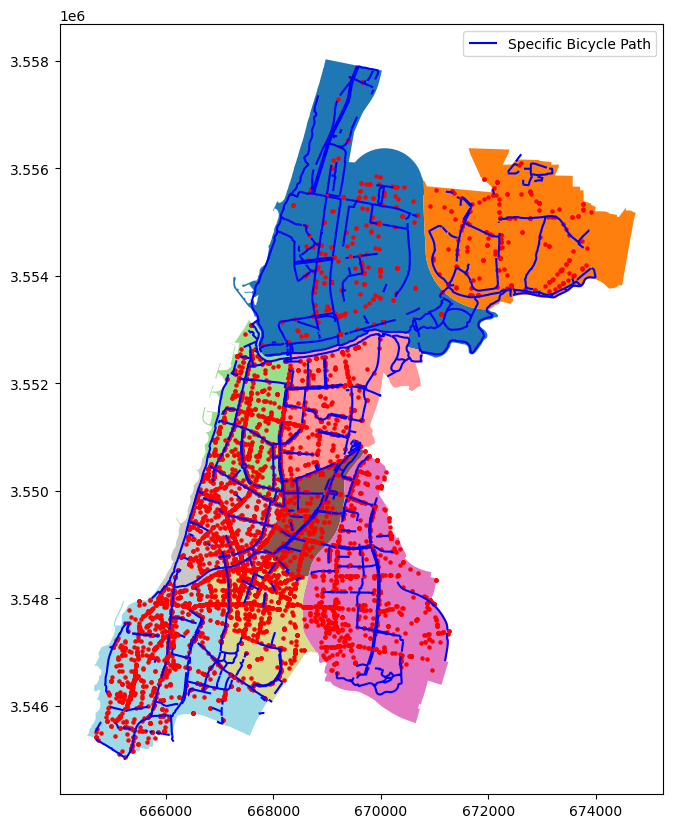

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

ta_q.plot(ax=ax, cmap='tab20', legend=True,)
bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
i_m_h_ta_mm_gdf.plot(ax=ax, color='red', marker='o', markersize=5 )

plt.legend()
plt.show()

In [11]:
ta_streets = gpd.read_file('./csv_tables/TA_streets_20240724_031704/Streets.shp')
ta_streets

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
0,1.0,915.0,הרוגי מלכות,HARUGEY MALKHOT,336.0,רחוב,0.0,507-10001,قتل مملكة,100.0,"LINESTRING (672865.880 3554095.253, 672895.216..."
1,2.0,0.0,0,UKNOWN,0.0,רחוב,3.0,507-10002,None,100.0,"LINESTRING (666990.498 3551436.940, 667065.337..."
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (667879.712 3551424.162, 667940.741..."
3,4.0,644.0,אלון יגאל,YIG'AL ALLON,2524.0,רחוב,0.0,507-10004,ألون ييغال,200.0,"LINESTRING (669570.036 3550420.535, 669581.404..."
4,5.0,634.0,מרגולין,MARGOLIN,2649.0,רחוב,1.0,507-10005,مارغولين,100.0,"LINESTRING (669329.153 3548322.758, 669409.403..."
...,...,...,...,...,...,...,...,...,...,...,...
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,"LINESTRING (665771.816 3547023.159, 665760.256..."
8875,9852.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20562,Avinri Yitzhak,100.0,"LINESTRING (665585.719 3547178.152, 665627.936..."
8876,9853.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20563,Avinri Yitzhak,100.0,"LINESTRING (665700.142 3547064.296, 665759.119..."
8877,9855.0,3907.0,3907,None,1703.0,רחוב,0.0,507-21960,3907,100.0,"LINESTRING (665087.059 3546677.092, 665075.120..."


In [90]:
# checking street names:
# אב exists in i_m_h_ta_gdf and ta_streets
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == 'אב'].street1_hebrew
# ta_streets[ta_streets.trechov == 'אב']

# אביגור שאול  can't find it, need to check in map. it's אביגור in ta_streets
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == 'אביגור שאול'].street1_hebrew
# ta_streets[ta_streets.trechov == 'שאול אביגור ']

# אבן ג'אנח is אבן גבירול

# street named 'ו doesn't exists on google maps so this needs to be dropped from ta_streets
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "'ו"].street1_hebrew
# ta_streets[ta_streets.trechov == "ו'"]

# street named: 'ל"א' no such street on google maps correlates to harav yossef tzoberi and part of another street ben sira yaakov
ta_streets[ta_streets.trechov == 'ל"א']
ta_streets[ta_streets.trechov == 'בן-סירה יעקב']
# correct oidrechov of ben-sira yaakov: [6270.0, 6303.0, 6621.0, 6622.0]	

# ta_streets[ta_streets.trechov == 'צוברי יוסף הרב']
# correct oidrechov of tzoberi: [6495.0, 9059.0, 9060.0, 6260.0, 6261.0, 9063.0, 9064.0]  

# street named in ta_streets אוריאל אקוסטה in google uriel da costa, in i_m_h_ta אורי
# אורי relates to לסר אורי
ta_streets[ta_streets.trechov == 'אוריאל אקוסטה']
# no accidents on אוריאל דה קוסטה

# street name it i_m_h_ta אלביטר עבדאלראוף, can't find similar name in ta_streets or google maps
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "אלביטר עבדאלראוף"]

# checking גני יהושע no correlation in ta_streets
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "גני צהלה"]
# so this is a park and has no street correlating to it

# גני צהלה same as גני יהושע these 2 places have 

# דרך אליאב לובה in i_m_h_ta_gpd, in google it's דרך לובה אריה אליאב, it's an underground road with 5 accidents
# checking המצודה in i_m_h_ta_gpd, seems like it not a real street

i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "המצודה"] 
# google maps shows it's in a building area, maybe the accident happened underground.

# המשתלה, seems to be a park, 5 accidents
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "המשתלה"]

# checking הס משה, should be הס
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הס משה"]

# checking הערבה, no street in ta_streets
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הערבה"]
# accident seems to be in a building area, maybe underground

# checking הקישון, no correlated street in ta_streets, there is a street in google maps.
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הקישון"]
# in ta_streets, הקישון correlates to אפרים קישון but the string line goes in to neighboring streets.

# הקריה general building area and not a street

# checking הרצוג In ta_street and הרב חיים הרצוג. there is not הרצוג in google maps, but there is שדרת חיים הרצוג 
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הרצוג"]

# checking in i_m_h_ta_gpd ויקי שירן corresponds to שירן ויקי ד"ר doesn't show in google maps in any variation
i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "ויקי שירן"]
# ויקי שירן in i_m_h_ta_gpd is the same place as הערבה, there is also no שירן ויקי ד"ר street in google maps. they will be dropped
# שירן ויקי ד"ר is used as part of הסוללים in google maps, but in apple maps it the same
# ד"ר דליה רביקובי'ץ is 1334 in google maps





,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,urban_intersection,accident_date,geometry
107117,2023077404,32023077404,3,3,2,נהג נפגע,2008,7,30-34,1,...,1.0,ישראלי,3.0,3.0,3.0-3.5,1.0,קל,NaN,2023-02-19 15:30:00,POINT (668890.758 3550310.513)
107164,2023077404,32023077404,3,3,1,נהג,1982,16,75-79,2,...,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,NaN,2023-02-19 15:30:00,POINT (668890.758 3550310.513)


Checking accidents intersection with street

In [129]:
street = ta_streets[ta_streets.trechov == 'מוזס ולטר ד"ר'].copy()
# ta_streets_buffed = ta_streets.copy()
# ta_streets_buffed['geometry'] = ta_streets_buffed.geometry.buffer(10)


# Buffer the LineString to create a Polygon
# Adjust the buffer distance as needed (e.g., 10 meters)
street_buffer = street.geometry.buffer(30)

# Create a GeoDataFrame from the buffered geometry
street_polygon = gpd.GeoDataFrame(street, geometry=street_buffer)

# # Ensure both GeoDataFrames have the same CRS
# i_m_h_ta_gdf = i_m_h_ta_gdf.to_crs(street_polygon.crs)

# Perform intersection to find accidents on the street
# accidents_on_street = gpd.sjoin(ta_streets_buffed, i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הקישון"]
# , how='inner', op='intersects')

accidents_on_street = gpd.sjoin(street, i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "הרב הרצוג"]
, how='inner', op='intersects')

accidents_on_street = gpd.sjoin(ta_streets, street_polygon, how='inner', op='intersects')

# Display the results
# accidents_on_street.geometry = accidents_on_street.geometry.buffer(10)
accidents_on_street

,oidrechov_left,krechov_left,trechov_left,shemangli_left,mslamas_left,tsug_left,kkivun_left,UniqueId_left,shemarvit_left,kreka_left,...,oidrechov_right,krechov_right,trechov_right,shemangli_right,mslamas_right,tsug_right,kkivun_right,UniqueId_right,shemarvit_right,kreka_right
2956,3007.0,797.0,קרמניצקי,KREMENETZKY,913.0,רחוב,0.0,507-13500,Karmanitsky,100.0,...,8874.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-13501,موسى والتر د.,100.0
2957,3008.0,797.0,קרמניצקי,KREMENETZKY,913.0,רחוב,0.0,507-13502,Karmanitsky,100.0,...,8874.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-13501,موسى والتر د.,100.0
7156,7714.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20405,موسى والتر د.,100.0,...,7958.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20598,موسى والتر د.,100.0
7156,7714.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20405,موسى والتر د.,100.0,...,7714.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20405,موسى والتر د.,100.0
7157,7715.0,1333.0,"שירן ויקי ד""ר",Shiran Viki Dr.,1300.0,רחוב,0.0,507-20407,شيران فيكي د.,100.0,...,7958.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20598,موسى والتر د.,100.0
7157,7715.0,1333.0,"שירן ויקי ד""ר",Shiran Viki Dr.,1300.0,רחוב,0.0,507-20407,شيران فيكي د.,100.0,...,7714.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20405,موسى والتر د.,100.0
7360,7958.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20598,موسى والتر د.,100.0,...,8875.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20597,موسى والتر د.,100.0
7360,7958.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20598,موسى والتر د.,100.0,...,7958.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20598,موسى والتر د.,100.0
7360,7958.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20598,موسى والتر د.,100.0,...,7714.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20405,موسى والتر د.,100.0
7705,8385.0,798.0,הסוללים,HASSOLELIM,2525.0,רחוב,0.0,507-13647,البطاريات,100.0,...,7714.0,1188.0,"מוזס ולטר ד""ר",MOSES WALTER,1500.0,רחוב,0.0,507-20405,موسى والتر د.,100.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


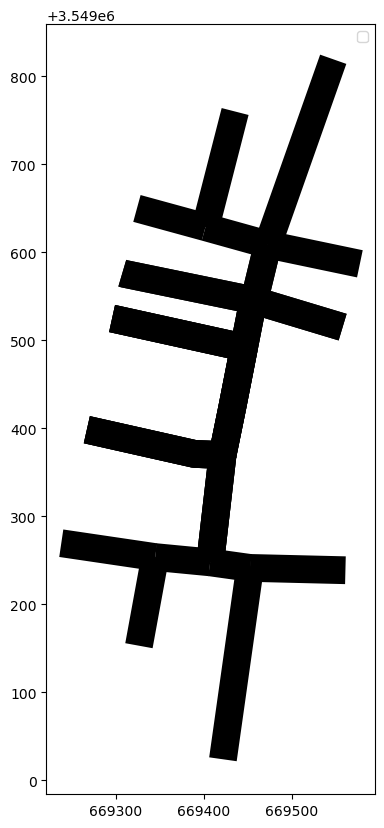

In [127]:
fig, ax = plt.subplots(figsize=(10, 10))
accidents_on_street.plot(ax=ax, color='black',linewidth=20)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


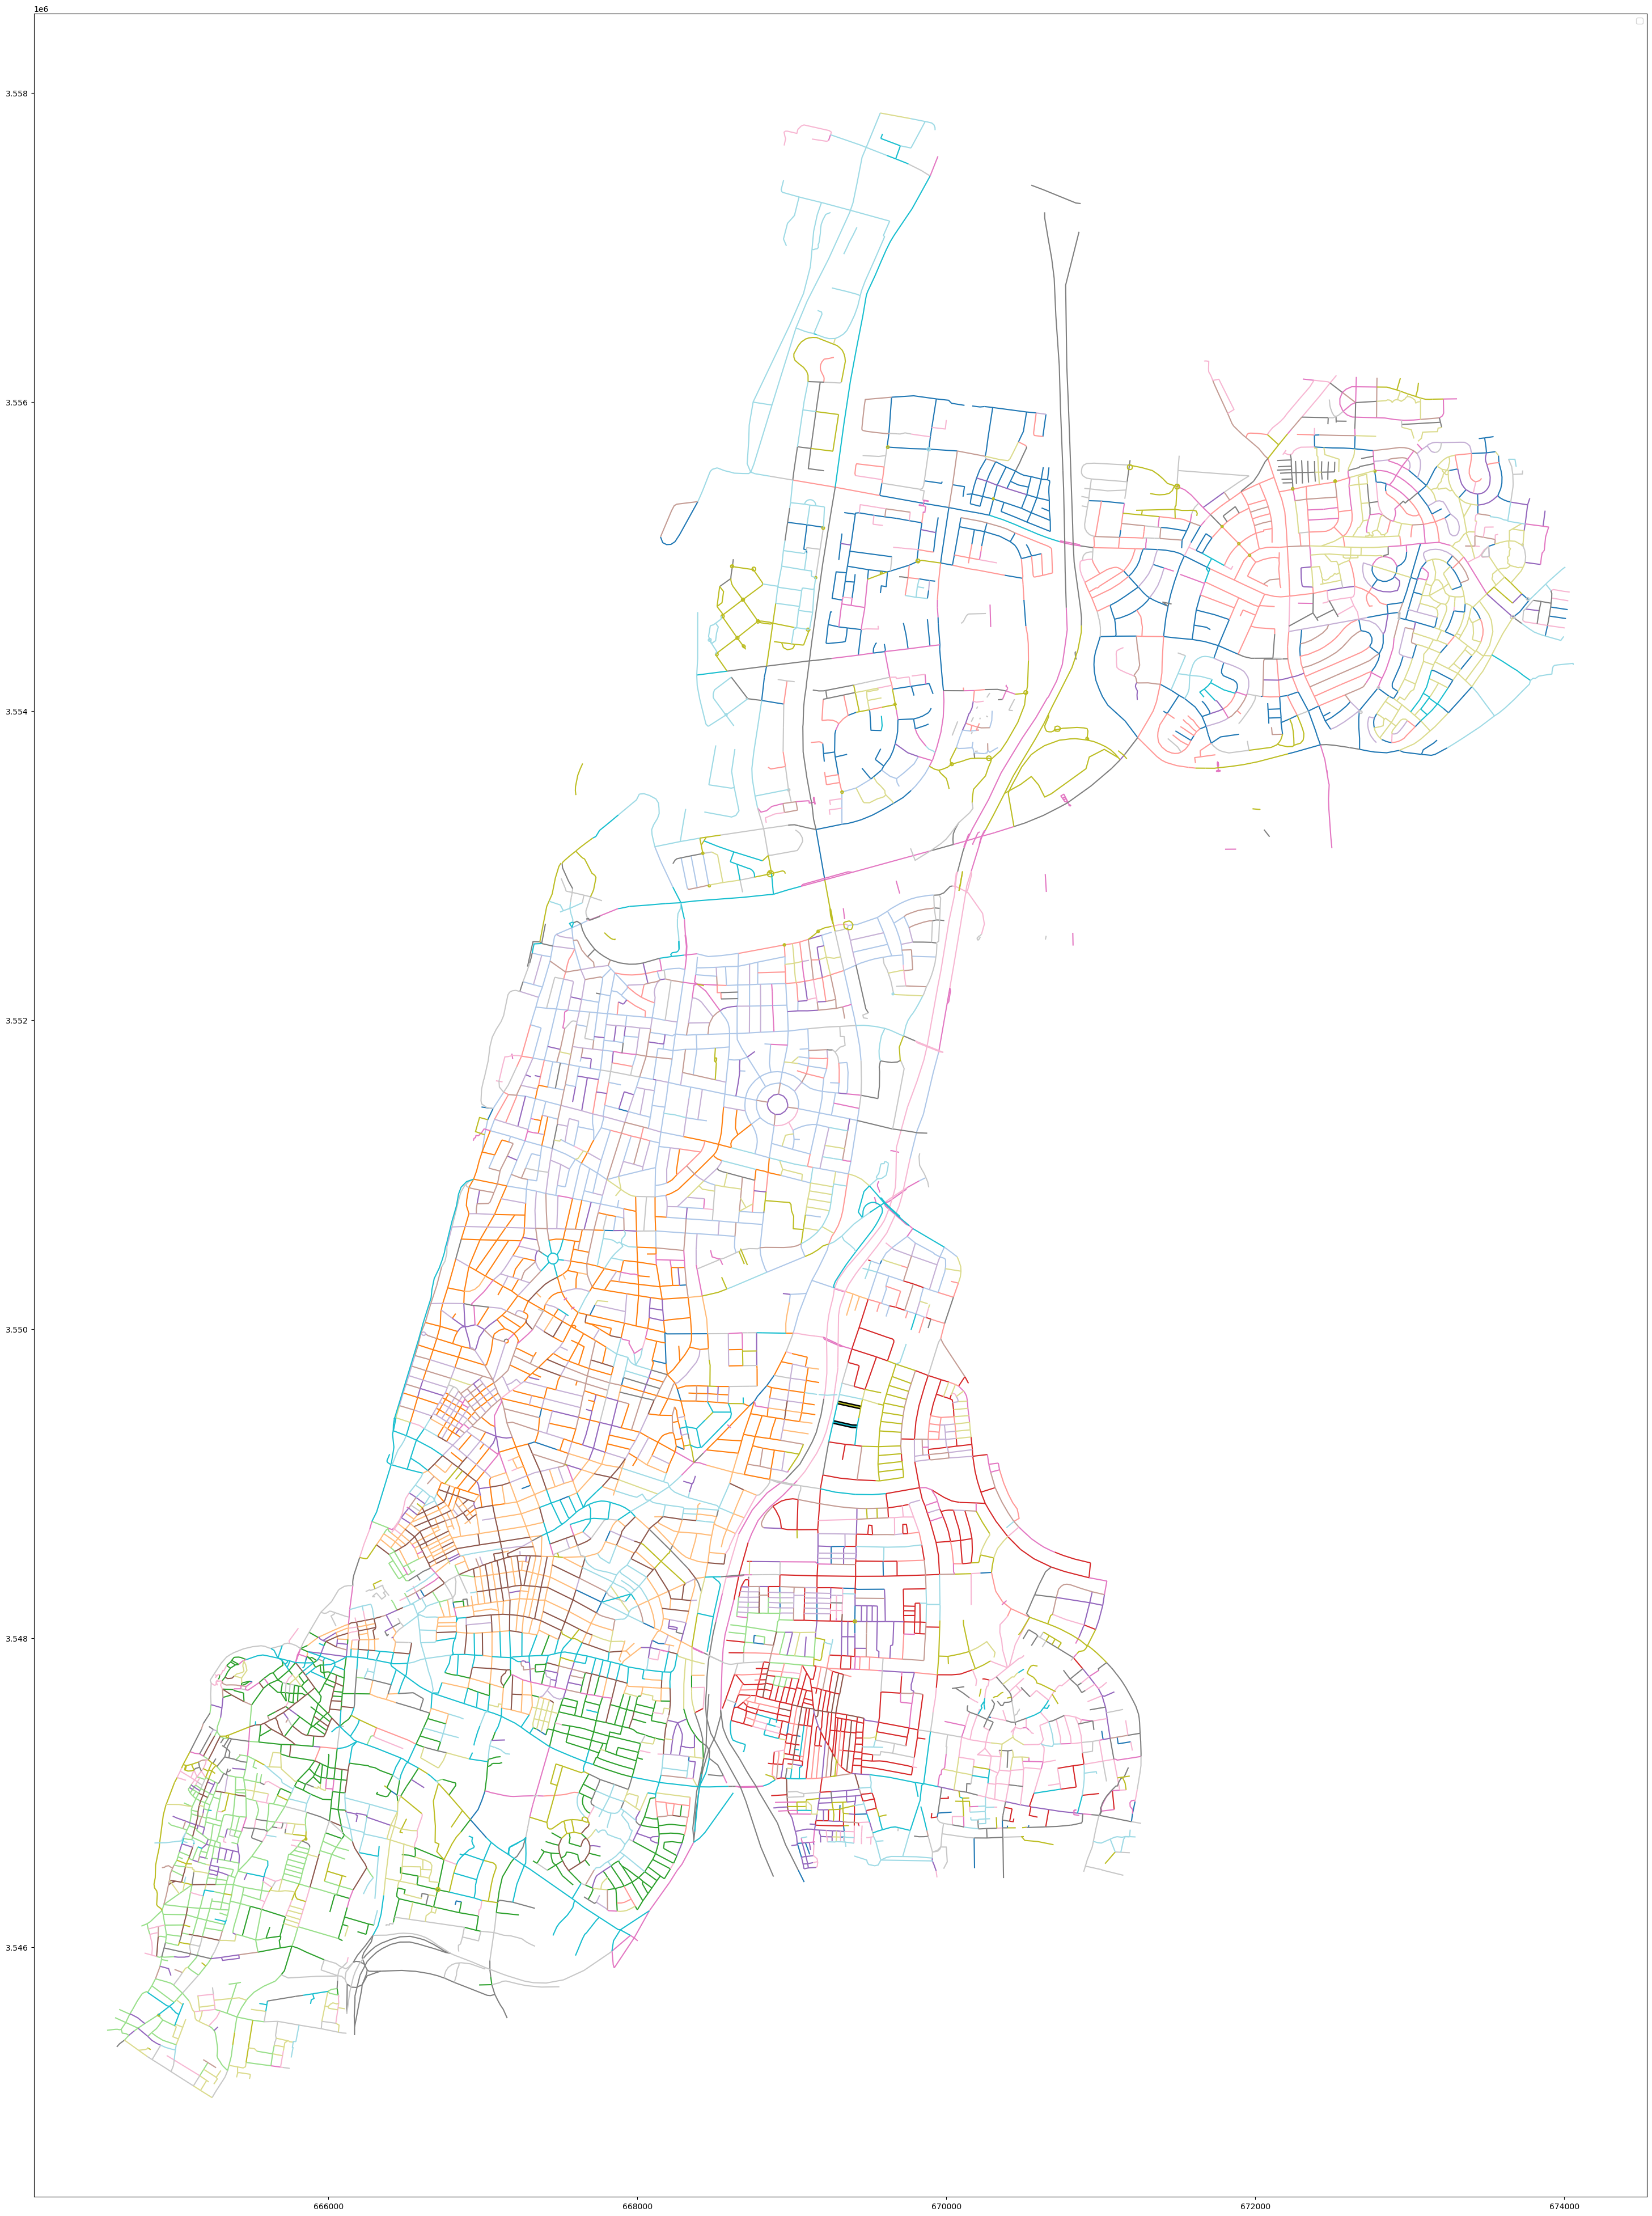

: 

In [138]:

fig, ax = plt.subplots(figsize=(50, 50))

# ta_streets[ta_streets.trechov == "תובל"].plot(ax=ax, color='black',linewidth=5)
ta_streets[ta_streets.trechov == 'שירן ויקי ד"ר'].plot(ax=ax, color='black',linewidth=5)
ta_streets[ta_streets.trechov == "רביקוביץ' דליה"].plot(ax=ax, color='black',linewidth=5)

# ta_streets[ta_streets.oidrechov.isin([6270.0, 6303.0])].plot(ax=ax, color='black', cmap='tab20', legend=True, label='Specific Bicycle Path',linewidth=5)
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "ויקי שירן"].plot(ax=ax, color='black', marker='o', markersize=5 )
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "דליה רביקוביץ"].plot(ax=ax, color='black', marker='o', markersize=5 )


ta_streets.plot(ax=ax, cmap='tab20')

# accidents_on_street.plot(ax=ax, color='black', label='Specific Bicycle Path')
# ta_q.plot(ax=ax, cmap='tab20', legend=True,)
# bp_ta_bp_and_meta.plot(ax=ax, color='blue', label='Specific Bicycle Path')
# i_m_h_ta_gdf.plot(ax=ax, color='black', marker='o', markersize=5 )
# accidents_on_street.plot(ax=ax, color='black', marker='o', markersize=15 )
# i_m_h_ta_gdf[i_m_h_ta_gdf.street1_hebrew == "אורי"].plot(ax=ax, color='black', marker='o', markersize=15 )


plt.legend()
plt.show()

In [15]:
import geopandas as gpd
from bokeh.io import output_file, show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource
import json

# Load your data
# ta_streets = gpd.read_parquet('your_data.parquet')

# Convert GeoDataFrame to GeoJSON
geojson_data = json.loads(ta_streets.to_json())

# Create GeoJSONDataSource
geo_source = GeoJSONDataSource(geojson=json.dumps(geojson_data))

# Create a figure
p = figure(title="Interactive Map with Bokeh", tools="pan,wheel_zoom,reset", active_scroll='wheel_zoom')

# Add a hover tool
hover = HoverTool()
hover.tooltips = [("Street Name", "@trechov")]
p.add_tools(hover)

# Add the streets to the map
p.patches('xs', 'ys', source=geo_source, fill_color='blue', line_color='black', fill_alpha=0.7)

# Output to an HTML file and show
output_file("interactive_map.html")
show(p)


Almost works

---

Trying leafmap

In [16]:
# pip install leafmap

In [17]:
import leafmap
import geopandas as gpd

# Load your data
# ta_streets = gpd.read_parquet('your_data.parquet')

# Create a map
m = leafmap.Map(center=(35.0, 35.0), zoom=10)

# Add the GeoDataFrame to the map
m.add_gdf(ta_streets, layer_name="Streets", info_mode='on_hover', hover_style={'fillColor': '#ffaf00', 'color': 'black'})

# Display the map
m


Map(center=[35.0, 35.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…